In [1]:
import numpy as np
import pandas as pd
import xarray as xr

In [67]:
np.random.seed(123)
size = 4
temperature = 15 + 10 * np.random.randn(size)
lat = np.random.uniform(low=-90, high=90, size=size)
lon = np.random.uniform(low=-180, high=180, size=size)

# round to two digits after decimal point
temperature, lat , lon = np.around([temperature, lat, lon], decimals=2)

In [68]:
#We will create a DataArray (xarray) from this data, let’s have a look at four ways to do that:
# 1. from a pandas Series
# 2. from a pandas DataFrame
# 3. using the DataArray constructor
# 4. using the DataArray constructor with projected coordinates

In [69]:
# 1. from panda Series
idx = pd.MultiIndex.from_arrays(arrays=[lat,lon], names=["lat","lon"])
s = pd.Series(data=temperature, index=idx)

# use from_series method
da = xr.DataArray.from_series(s)
da

<xarray.DataArray (lat: 4, lon: 4)>
array([[  nan, 24.97,   nan,   nan],
       [  nan,   nan,   nan, -0.06],
       [  nan,   nan,  4.14,   nan],
       [17.83,   nan,   nan,   nan]])
Coordinates:
  * lat      (lat) float64 -13.84 33.27 39.5 86.54
  * lon      (lon) float64 -56.46 -38.84 -6.86 82.46

In [70]:
# 2. from dataframe
df = pd.DataFrame({"temperature":temperature, "lat":lat, "lon":lon})
df_pv = df.pivot(index="lat", columns="lon")
df_pv = df_pv.droplevel(0, axis=1)
da = xr.DataArray(data=df_pv)


In [71]:
df

,lat,lon,temperature
0,39.50,-6.86,4.14
1,-13.84,-38.84,24.97
2,86.54,-56.46,17.83
3,33.27,82.46,-0.06


In [72]:
df_pv

lon,-56.46,-38.84,-6.86,82.46
lat,,,,
-13.84,NaN,24.97,NaN,NaN
33.27,NaN,NaN,NaN,-0.06
39.50,NaN,NaN,4.14,NaN
86.54,17.83,NaN,NaN,NaN


In [73]:
da

<xarray.DataArray (lat: 4, lon: 4)>
array([[  nan, 24.97,   nan,   nan],
       [  nan,   nan,   nan, -0.06],
       [  nan,   nan,  4.14,   nan],
       [17.83,   nan,   nan,   nan]])
Coordinates:
  * lat      (lat) float64 -13.84 33.27 39.5 86.54
  * lon      (lon) float64 -56.46 -38.84 -6.86 82.46

In [74]:
# 3. manually; 
# get pivoted data as 2-dimensional array (4,4)
temperature_2d = df_pv.values    
da = xr.DataArray(data=temperature_2d, dims=["lat", "lon"], coords=[lat,lon])
da


# alternative way to do the same thing
# xr.DataArray(data=temperature_2d, coords=[("lat",lat), ("lon",lon)])

<xarray.DataArray (lat: 4, lon: 4)>
array([[  nan, 24.97,   nan,   nan],
       [  nan,   nan,   nan, -0.06],
       [  nan,   nan,  4.14,   nan],
       [17.83,   nan,   nan,   nan]])
Coordinates:
  * lat      (lat) float64 39.5 -13.84 86.54 33.27
  * lon      (lon) float64 -6.86 -38.84 -56.46 82.46

In [52]:
temperature_2d

### coordinate arrays must be 1 dimensional and have the length of the dimension they represent. 
#We had a (4,4) shaped array of data, so we supplied the constructor with two coordinate arrays. 
#Each one is 1-dimensional and has a length of 4.

array([[  nan, 24.97,   nan,   nan],
       [  nan,   nan,   nan, -0.06],
       [  nan,   nan,  4.14,   nan],
       [17.83,   nan,   nan,   nan]])

In [53]:
# 4. projected coordinates

In [108]:
np.random.seed(123)
shape = (1,4)    # needs to be 2-dimensional, could be (2,2), (4,1)

# all three arrays have the same shape
temperature = 15 + 10 * np.random.randn(*shape)
lat = np.random.uniform(low=-90, high=90, size=shape)
lon = np.random.uniform(low=-180, high=180, size=shape)

# round to two digits after decimal point
temperature, lat , lon = np.around([temperature, lat, lon], decimals=2)

In [109]:
lon.shape

(1, 4)

In [110]:
da = xr.DataArray(data=temperature,
                  coords={"lat": (["x","y"], lat),
                          "lon": (["x","y"], lon)},
                  dims=["x","y"])

In [101]:
da

<xarray.DataArray (x: 1, y: 4)>
array([[ 4.14, 24.97, 17.83, -0.06]])
Coordinates:
    lat      (x, y) float64 39.5 -13.84 86.54 33.27
    lon      (x, y) float64 -6.86 -38.84 -56.46 82.46
Dimensions without coordinates: x, y

In [125]:
#### 3D ####
np.random.seed(123)

temperature_3d = 15 + 10 * np.random.randn(1, 4,2)    # 3-dimensional
pressure_3d = 1013 + 10 * np.random.randn(1,4,2)

lat = np.random.uniform(low=-90, high=90, size=(1, 4))
lon = np.random.uniform(low=-180, high=180, size=(1, 4))

# round to two digits after decimal point
temperature_3d, pressure_3d = np.around([temperature_3d, pressure_3d], decimals=2)
lat , lon = np.around([lat, lon], decimals=2)

In [122]:
#### DataArray ###
da = xr.DataArray(data=temperature_3d,
                  coords={"lat": (["x","y"], lat),
                          "lon": (["x","y"], lon),
                          "day": ["day1", "day2"]},
                  dims=["x","y","day"])
da

<xarray.DataArray (x: 1, y: 4, day: 2)>
array([[[ 4.14, 24.97],
        [17.83, -0.06],
        [ 9.21, 31.51],
        [-9.27, 10.71]]])
Coordinates:
    lat      (x, y) float64 -28.23 41.23 -11.06 -79.26
    lon      (x, y) float64 -36.7 85.68 -114.3 -116.8
  * day      (day) |S4 'day1' 'day2'
Dimensions without coordinates: x, y

In [127]:
#### DataSet ###
da = xr.Dataset(data_vars={'temperature': (["x", "y", "day"], temperature_3d),
                           'pressure': (["x", "y", "day"], pressure_3d)},
                  
                        coords={"lat": (["x","y"], lat),
                          "lon": (["x","y"], lon),
                          "day": ["day1", "day2"]})

In [128]:
da

<xarray.Dataset>
Dimensions:      (day: 2, x: 1, y: 4)
Coordinates:
    lat          (x, y) float64 5.68 5.73 24.19 62.9
    lon          (x, y) float64 80.8 39.97 80.08 -63.73
  * day          (day) |S4 'day1' 'day2'
Dimensions without coordinates: x, y
Data variables:
    pressure     (x, y, day) float64 1.026e+03 1.004e+03 ... 1.009e+03 1.009e+03
    temperature  (x, y, day) float64 4.14 24.97 17.83 ... 31.51 -9.27 10.71

In [131]:
######################## Tutorial 2 ##################
# 
da = xr.DataArray([9, 0, 2, 1, 0], dims=['x'], coords={'x':[10, 20, 30, 40, 50]})
da

<xarray.DataArray (x: 5)>
array([9, 0, 2, 1, 0])
Coordinates:
  * x        (x) int64 10 20 30 40 50

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/xarray/plot/utils.py:51: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  """Import pyplot as register appropriate converters."""


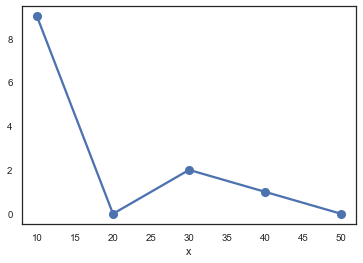

In [132]:
da.plot(marker='o')

In [2]:
### Load multi-dim data; 
S = np.random.randn(78, 75)
T = np.random.randn(78, 75)
P = np.random.randn(78, 75)
levels = np.arange(1, 79)
lon = np.random.randn(75)
lat = np.random.randn(75)
date = range(1, 76)

In [3]:
da_salinity = xr.DataArray(S, dims=['level', 'date'],
                           coords={'level': levels,
                                   'date': date},)
da_salinity

<xarray.DataArray (level: 78, date: 75)>
array([[ 2.069659,  0.590335, -0.760894, ...,  0.028152, -0.955248,  1.666832],
       [ 1.121904, -0.090385,  0.12727 , ...,  0.361687, -1.493052,  0.280248],
       [ 0.142273,  1.211481, -0.050001, ..., -1.125016, -0.108147, -1.725334],
       ...,
       [ 0.439312, -1.165112,  0.799838, ...,  0.982181, -0.247557,  1.755339],
       [ 0.998065,  0.760493,  1.951273, ..., -1.402165,  0.015287,  0.665007],
       [-1.900877, -1.214446,  0.051168, ..., -1.094166, -0.018283,  1.383365]])
Coordinates:
  * date     (date) int64 1 2 3 4 5 6 7 8 9 10 ... 66 67 68 69 70 71 72 73 74 75
  * level    (level) int64 1 2 3 4 5 6 7 8 9 10 ... 70 71 72 73 74 75 76 77 78

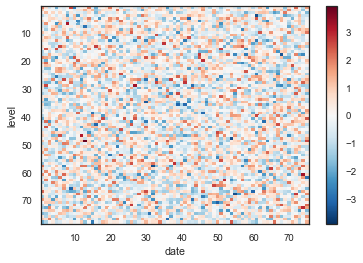

In [4]:
da_salinity.plot(yincrease=False)

In [5]:
da_salinity.attrs['units'] = 'PSU'
da_salinity.attrs['standard_name'] = 'sea_water_salinity'
da_salinity

<xarray.DataArray (level: 78, date: 75)>
array([[ 2.069659,  0.590335, -0.760894, ...,  0.028152, -0.955248,  1.666832],
       [ 1.121904, -0.090385,  0.12727 , ...,  0.361687, -1.493052,  0.280248],
       [ 0.142273,  1.211481, -0.050001, ..., -1.125016, -0.108147, -1.725334],
       ...,
       [ 0.439312, -1.165112,  0.799838, ...,  0.982181, -0.247557,  1.755339],
       [ 0.998065,  0.760493,  1.951273, ..., -1.402165,  0.015287,  0.665007],
       [-1.900877, -1.214446,  0.051168, ..., -1.094166, -0.018283,  1.383365]])
Coordinates:
  * date     (date) int64 1 2 3 4 5 6 7 8 9 10 ... 66 67 68 69 70 71 72 73 74 75
  * level    (level) int64 1 2 3 4 5 6 7 8 9 10 ... 70 71 72 73 74 75 76 77 78
Attributes:
    units:          PSU
    standard_name:  sea_water_salinity

In [8]:
##### Datasets ###
argo = xr.Dataset(
        data_vars={'salinity':    (('level', 'date'), S),
                   'temperature': (('level', 'date'), T),
                   'pressure':    (('level', 'date'), P),
                   'lat': (('date'), lat),
                   'lon': (('date'), lon)},
        coords={'level': levels,
                'date': date})
argo

<xarray.Dataset>
Dimensions:      (date: 75, level: 78)
Coordinates:
  * date         (date) int64 1 2 3 4 5 6 7 8 9 ... 67 68 69 70 71 72 73 74 75
  * level        (level) int64 1 2 3 4 5 6 7 8 9 ... 70 71 72 73 74 75 76 77 78
Data variables:
    lat          (date) float64 0.324 0.8891 1.225 ... 0.4122 0.9851 -1.126
    pressure     (level, date) float64 0.3761 1.856 -0.1993 ... -1.621 1.567
    lon          (date) float64 0.8784 -1.122 0.5182 ... 0.9906 -0.8899 0.006541
    temperature  (level, date) float64 -0.1266 1.427 -1.167 ... 0.1403 -1.752
    salinity     (level, date) float64 2.07 0.5903 -0.7609 ... -0.01828 1.383

In [13]:
#argo['lon'] = lon
# del argo['lon']
# del argo['lat']

## Add coordinates --> argo[key] = (dim, value)
argo['lon'] = ('date', lon)
argo['lat'] = ('date', lat)
argo

<xarray.Dataset>
Dimensions:      (date: 75, level: 78)
Coordinates:
  * date         (date) int64 1 2 3 4 5 6 7 8 9 ... 67 68 69 70 71 72 73 74 75
  * level        (level) int64 1 2 3 4 5 6 7 8 9 ... 70 71 72 73 74 75 76 77 78
Data variables:
    pressure     (level, date) float64 0.3761 1.856 -0.1993 ... -1.621 1.567
    temperature  (level, date) float64 -0.1266 1.427 -1.167 ... 0.1403 -1.752
    salinity     (level, date) float64 2.07 0.5903 -0.7609 ... -0.01828 1.383
    lon          (date) float64 0.8784 -1.122 0.5182 ... 0.9906 -0.8899 0.006541
    lat          (date) float64 0.324 0.8891 1.225 ... 0.4122 0.9851 -1.126

In [11]:
argo

<xarray.Dataset>
Dimensions:      (date: 75, level: 78)
Coordinates:
  * date         (date) int64 1 2 3 4 5 6 7 8 9 ... 67 68 69 70 71 72 73 74 75
  * level        (level) int64 1 2 3 4 5 6 7 8 9 ... 70 71 72 73 74 75 76 77 78
Data variables:
    pressure     (level, date) float64 0.3761 1.856 -0.1993 ... -1.621 1.567
    temperature  (level, date) float64 -0.1266 1.427 -1.167 ... 0.1403 -1.752
    salinity     (level, date) float64 2.07 0.5903 -0.7609 ... -0.01828 1.383

In [ ]:
### make lat/long coordinates (not data) 


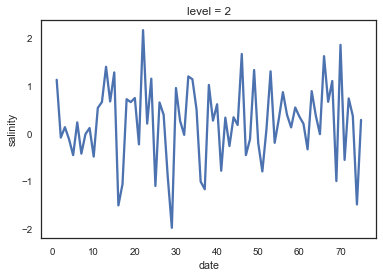

In [14]:
argo.salinity[1, :].plot()

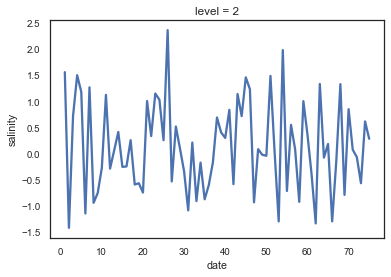

In [186]:
####### Indexing --> select levels ##########
argo.salinity.sel(level=2).plot()

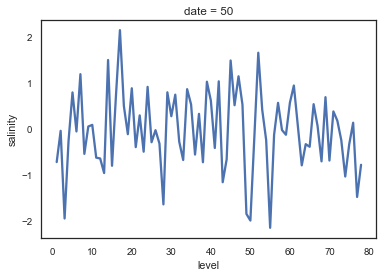

In [189]:
argo.salinity.sel(date=50).plot()

In [194]:
argo.sel(date=slice(10, 50), level=slice(60, 70))

<xarray.Dataset>
Dimensions:      (date: 41, level: 11)
Coordinates:
  * date         (date) int64 10 11 12 13 14 15 16 17 ... 44 45 46 47 48 49 50
  * level        (level) int64 60 61 62 63 64 65 66 67 68 69 70
Data variables:
    lat          (date) float64 -1.242 -0.2068 -1.752 ... 0.4367 3.322 -1.026
    pressure     (level, date) float64 -1.063 0.2754 0.6052 ... -0.3664 -0.7901
    lon          (date) float64 -0.6695 -2.41 -0.06892 ... -0.5595 -1.157
    temperature  (level, date) float64 -1.785 -0.1892 0.5829 ... 0.5161 -0.7975
    salinity     (level, date) float64 -0.5408 -0.2044 0.6168 ... -0.613 -0.6988

In [18]:
q = np.cos(argo.temperature) * np.sin(argo.salinity)**2

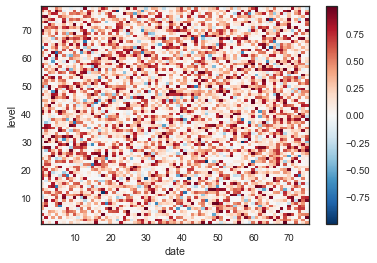

In [20]:
q.plot()

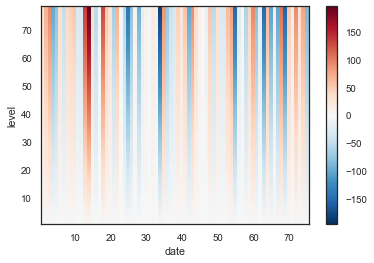

In [22]:
level_times_lat = argo.level * argo.lat
level_times_lat.plot()

In [25]:
argo.level

<xarray.DataArray 'level' (level: 78)>
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78])
Coordinates:
  * level    (level) int64 1 2 3 4 5 6 7 8 9 10 ... 70 71 72 73 74 75 76 77 78

In [26]:
argo_mean = argo.mean(dim='date')

In [27]:
argo_mean

<xarray.Dataset>
Dimensions:      (level: 78)
Coordinates:
  * level        (level) int64 1 2 3 4 5 6 7 8 9 ... 70 71 72 73 74 75 76 77 78
Data variables:
    pressure     (level) float64 0.2729 0.01595 -0.08238 ... -0.1038 -0.09057
    temperature  (level) float64 0.07383 0.1026 0.112 ... -0.1463 -0.03974
    salinity     (level) float64 -0.05345 0.2346 -0.1909 ... -0.1355 -0.001655
    lon          float64 -0.1902
    lat          float64 -0.0232

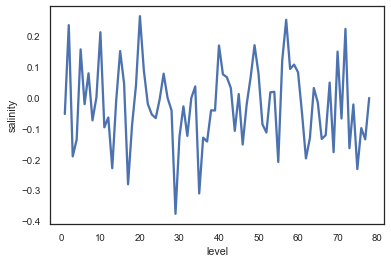

In [28]:
argo_mean.salinity.plot()